!pip install tellurium

In [134]:
import tellurium as te
import matplotlib.pyplot as plt

In [136]:

antimony_model_B = """
// Created by libAntimony v2.15.0
model *inhalation_B_art_ven()

  // Compartments and Species:
  compartment Air, Arterial, Venous, RestofBody, Lung;
  substanceOnly species Aair in Air, Aart in Arterial, Aven in Venous, Arest in RestofBody, Alung in Lung;

  // Assignment Rules:
  Vblood := BW*sc_Vblood;
  Vrest := BW*sc_Vrest;
  Vlung := BW*sc_Vlung;
  Vart := Vblood/3;
  Vven := Vblood - Vart;


  // Reactions:
  _J0: Aair -> Alung; Falv*(Aair/Vair)*Fabs;
  _J1: Alung -> Aart; Qlung*(Alung/Vlung)/k_lung_blood;
  _J2: Aven -> Alung; Qlung*(Aven/Vven);
  _J3: Aart -> Arest; Qrest*(Aart/Vart); 
  _J4: Arest -> Aven ; Qrest*(Arest/Vrest)/k_rest_blood;
  _J5: Aven -> Aart; CO*(Aven/Vven);
  _J6: Alung -> Aair; Falv*(Alung/Vlung)/PCAir;

// Initial values
  Aair = 0; 
  Aair has MicroGM_per_L;
  Arest = 0;
  Arest has MicroGM_per_L;
  Alung = 0;
  Alung has MicroGM_per_L;
  Aart = 0;
  Aart has MicroGM_per_L;
  Aven = 0;
  Aven has MicroGM_per_L;

  // Compartment initializations:
  Vair = 1;
  Air has L;
  Arterial has L;
  Venous has L;
  RestofBody has L;
  Lung has L;
  
  // Variable initializations:
#------------------------
# Parameters
#------------------------
#------------------------
# Body size & base volumes
#------------------------

  BW = 70;
  BW has KiloGM;

  sc_Vblood = 0.074; // blood volume as a fraction of body weight #Quindroit2019
  sc_Vblood has L_PER_KiloGM;

  sc_Vlung = 0.0068; // lung volume as a fraction of body weight #Quindroit2019
  sc_Vlung has L_PER_KiloGM;

  sc_Vrest = 0.96-sc_Vblood-sc_Vlung; // rest of body volume as a fraction of body weight
  sc_Vrest has L_PER_KiloGM;

#------------------------
# Plasma Flows
#------------------------
  CO = 12.5*BW^0.75;  # L/h (cardiac output)
  CO has L_PER_HR;

  sc_Qlung = 0.026; #Quindroit2019

  Qlung = CO * sc_Qlung ;
  Qrest = CO-Qlung; 
  

   Falv = 210;
   Falv has L_PER_HR;

// Chemicals
#------------------------
# Chemicals
#------------------------

  Fabs = 0.3; 

  k_rest_blood = 0.5;
  k_rest_blood has UNITLESS;

  k_lung_blood = 0.5;
  k_lung_blood has UNITLESS;

  PCAir = 2000;
  PCAir has UNITLESS;

  // Other declarations:
  var Arterial, Venous, RestofBody, CO;
  const Air, BW, sc_Vblood, sc_Vrest, sc_Vlung, sc_Qlung, k_rest_blood, k_lung_blood, PCAir;
  const Falv, Fabs;

  // Unit definitions:
  unit MicroGM = 1e-6 gram;
  unit HR = 3600 second;
  unit L = litre;
  unit KiloGM = 1e3 gram;
  unit L_PER_KiloGM = litre / 1e3 gram;
  unit L_PER_HR_PER_KiloGM0P75 = litre / (3600 second * (1e3 gram)^-0);
  unit UNITLESS = dimensionless;
  unit L_PER_HR = litre / 3600 second;
  unit volume = L;
  unit substance = MicroGM;
  unit extent = MicroGM;
  unit time_unit = HR;
  unit MicroGM_per_L = 1e-6 gram / litre;


end



"""

# Charger le modèle
r = te.loada(antimony_model_B)

# Exporter en SBML
sbml_str = r.getSBML()

# Sauvegarder dans un fichier
with open("inhalation_blood_B.xml", "w") as f:
    f.write(sbml_str)

print("✅ Fichier SBML généré : inhalation_blood_B.xml")

✅ Fichier SBML généré : inhalation_blood_B.xml


In [138]:
r.getGlobalParameterIds()

['BW',
 'sc_Vblood',
 'sc_Vrest',
 'sc_Vlung',
 'Falv',
 'Vair',
 'Fabs',
 'Qlung',
 'k_lung_blood',
 'Qrest',
 'k_rest_blood',
 'CO',
 'PCAir',
 'sc_Qlung',
 'Vblood',
 'Vrest',
 'Vlung',
 'Vart',
 'Vven']

In [140]:
print(f"Aair={r.Aair}, Art={r.Aart}, Aven={r.Aven}, Arest={r.Arest}")
print(f"Vrest={getattr(r, 'Vrest', 'Non défini')}")
print(f"Vlung={getattr(r, 'Vlung', 'Non défini')}")
print(f"Air={getattr(r, 'Air', 'Non défini')}, Art={getattr(r, 'Art', 'Non défini')}, Ven={getattr(r, 'Ven', 'Non défini')}")
print(f"Fabs={r.Fabs}, PCAir={r.PCAir}, Falv={r.Falv}, BW={r.BW}")

print(hasattr(r, 'Vrest'))



Aair=0.0, Art=0.0, Aven=0.0, Arest=0.0
Vrest=61.544
Vlung=0.476
Air=1.0, Art=Non défini, Ven=Non défini
Fabs=0.3, PCAir=2000.0, Falv=210.0, BW=70.0
True


In [142]:
# Update for chemical parameters
r.Fabs = 0.3
r.PCAir = 2000
# Change the initial quantity in air (here 4.97e-05 µg) / single exposure
r.Aair = 4.97e-05
#r.Falv = 90 #1y-old
#r.BW = 12 #1y-old
simulation = r.simulate(0, 7, 300)

In [144]:
import pandas as pd
df = pd.DataFrame(simulation, columns=r.timeCourseSelections)
df.head()  

,time,[Aair],[Aart],[Aven],[Arest],[Alung]
0,0.000000,4.970000e-05,0.000000,0.000000e+00,0.000000,0.000000
1,0.023411,1.142668e-05,0.000004,4.368221e-07,0.000009,0.000024
2,0.046823,2.668707e-06,0.000004,1.856491e-06,0.000024,0.000017
3,0.070234,6.424514e-07,0.000004,3.087595e-06,0.000033,0.000009
4,0.093645,1.635523e-07,0.000003,3.814099e-06,0.000038,0.000005


In [146]:
# Mass balance (Amounts)
air_mass = simulation[:, 1] * r.Aair
art_mass = simulation[:, 2] * r.Aart
ven_mass = simulation[:, 3] * r.Aven
rest_mass = simulation[:, 4] * r.Arest
lung_mass = simulation[:, 5] * r.Alung

total_mass =  art_mass + ven_mass + rest_mass + air_mass + lung_mass

MB_check = air_mass - art_mass - ven_mass - rest_mass - lung_mass
MB_check

[ 5.42744945e-14 -4.05852111e-10 -1.04141293e-09 -1.43957402e-09
 -1.64464582e-09 -1.74372913e-09 -1.79036221e-09 -1.81204878e-09
 -1.82207676e-09 -1.82670097e-09 -1.82883045e-09 -1.82981044e-09
 -1.83026129e-09 -1.83046866e-09 -1.83056405e-09 -1.83060792e-09
 -1.83062809e-09 -1.83063737e-09 -1.83064164e-09 -1.83064360e-09
 -1.83064450e-09 -1.83064492e-09 -1.83064511e-09 -1.83064519e-09
 -1.83064522e-09 -1.83064524e-09 -1.83064526e-09 -1.83064527e-09
 -1.83064528e-09 -1.83064529e-09 -1.83064529e-09 -1.83064528e-09
 -1.83064528e-09 -1.83064528e-09 -1.83064528e-09 -1.83064528e-09
 -1.83064528e-09 -1.83064528e-09 -1.83064528e-09 -1.83064528e-09
 -1.83064528e-09 -1.83064528e-09 -1.83064528e-09 -1.83064528e-09
 -1.83064528e-09 -1.83064528e-09 -1.83064528e-09 -1.83064528e-09
 -1.83064528e-09 -1.83064528e-09 -1.83064528e-09 -1.83064528e-09
 -1.83064529e-09 -1.83064529e-09 -1.83064529e-09 -1.83064528e-09
 -1.83064528e-09 -1.83064528e-09 -1.83064528e-09 -1.83064528e-09
 -1.83064528e-09 -1.83064

In [148]:
r.timeCourseSelections

#import pandas as pd

#df = pd.DataFrame(simulation, columns=r.timeCourseSelections)
#df.head()  

# time column is equal to 0

['time', '[Aair]', '[Aart]', '[Aven]', '[Arest]', '[Alung]']

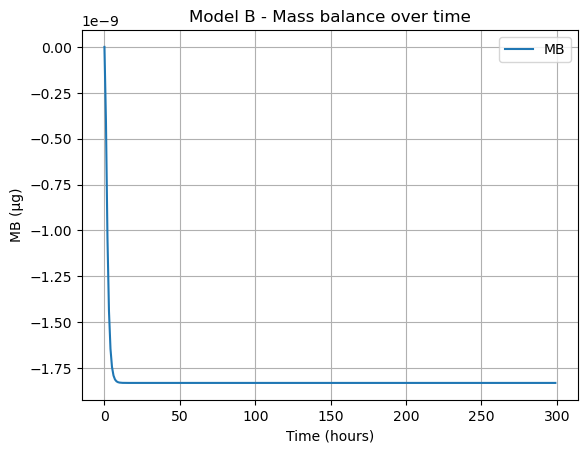

In [150]:
# plot MB
plt.plot(MB_check, label='MB')
plt.xlabel('Time (hours)')
plt.ylabel('MB (µg)')
plt.title('Model B - Mass balance over time')
plt.legend()
plt.grid(True)
plt.show()

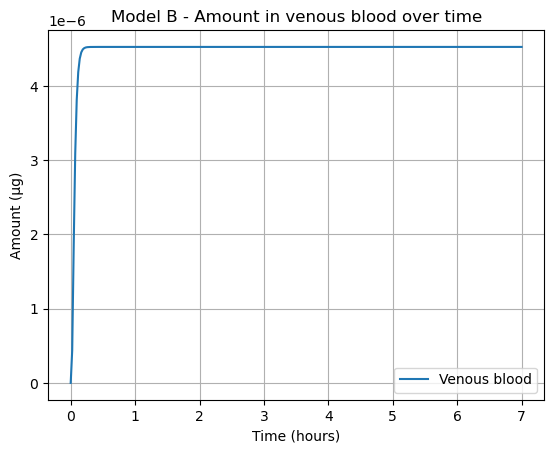

In [122]:
# Plot the amount
plt.plot(simulation[:, 0], simulation[:, 3], label='Venous blood')
plt.xlabel('Time (hours)')
plt.ylabel('Amount (µg)')
plt.title('Model B - Amount in venous blood over time')
plt.legend()
plt.grid(True)
plt.show()

In [124]:
print(r.getFloatingSpeciesIds())

['Aair', 'Aart', 'Aven', 'Arest', 'Alung']


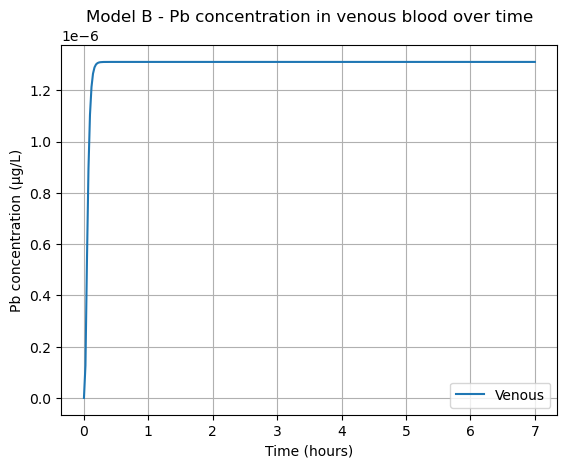

In [126]:
# Plot the concentration in venous blood
plt.plot(simulation[:, 0], simulation[:, 3]/r.Vven, label='Venous')
plt.xlabel('Time (hours)')
plt.ylabel('Pb concentration (µg/L)')
plt.title('Model B - Pb concentration in venous blood over time')
plt.legend()
plt.grid(True)
plt.show()

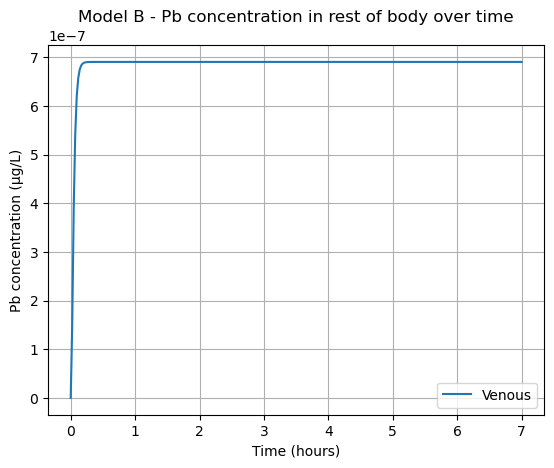

In [128]:
# Plot the concentration in rest of body
plt.plot(simulation[:, 0], simulation[:, 4]/r.Vrest, label='Venous')
plt.xlabel('Time (hours)')
plt.ylabel('Pb concentration (µg/L)')
plt.title('Model B - Pb concentration in rest of body over time')
plt.legend()
plt.grid(True)
plt.show()

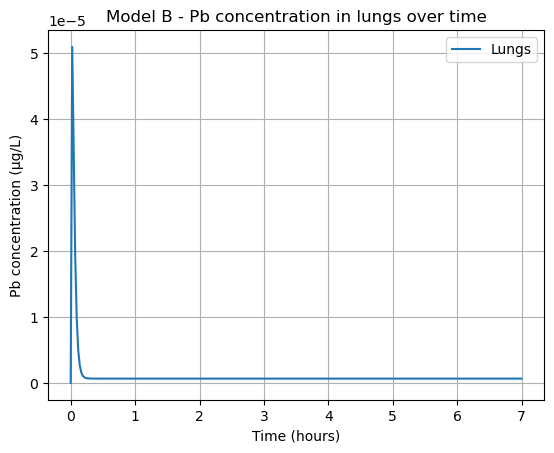

In [130]:
# Plot the concentration in lungs
plt.plot(simulation[:, 0], simulation[:, 5]/r.Vlung, label='Lungs')
plt.xlabel('Time (hours)')
plt.ylabel('Pb concentration (µg/L)')
plt.title('Model B - Pb concentration in lungs over time')
plt.legend()
plt.grid(True)
plt.show()